In [1]:
# Import librairies
import folium
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from folium.plugins import FloatImage

In [2]:
# Read the data from your CSV file
data = pd.read_csv('minard_chard/data_from_minard.csv')

# Filter out rows with missing latitude and longitude
data = data.dropna(subset=['latc', 'lonc'])

# Create a GeoDataFrame from the DataFrame, specifying the geometry as points
gdf = gpd.GeoDataFrame(data, geometry=gpd.points_from_xy(data['lonc'], data['latc']))

In [6]:
# Create a colormap for the temperature column
cmap = plt.cm.hot
norm = mcolors.Normalize(min(data['temp']), max(data['temp']))

# Create a list of colors for each city
colors = ['red', 'blue', 'green', 'purple', 'orange', 'darkred', 'lightred', 'beige', 'darkblue', 'darkgreen', 'cadetblue', 'darkpurple', 'pink', 'lightblue', 'lightgreen', 'gray', 'black', 'lightgray']

# Create a Folium map centered on the first city in the DataFrame
m = folium.Map(location=[data['latc'].iloc[0], data['lonc'].iloc[0]], zoom_start=6, tiles='OpenStreetMap')

# Add markers for each city to the map, colored by temperature
for index, row in gdf.iterrows():
    # Create a popup with the city information
    popup_text = f"City: {row['city']}<br>Latitude: {row['latc']}<br>Longitude: {row['lonc']}<br>Temperature: {row['temp']}°C<br>Survivors: {row['surv']}<br>Date: {row['mon']} {row['day']}, {row['days']}"
    
    # Add a marker for the city to the map
    folium.CircleMarker(location=[row['geometry'].y, row['geometry'].x], radius=5, color=None, fill=True, fill_color=colors[index % len(colors)], fill_opacity=0.7, popup=popup_text).add_to(m)

    # Add the city name as a label to the marker
    folium.Marker(location=[row['geometry'].y, row['geometry'].x], radius=5, color=None, fill=True, fill_color=colors[index % len(colors)], fill_opacity=0.7, popup=popup_text).add_to(m)

# Display the map
m

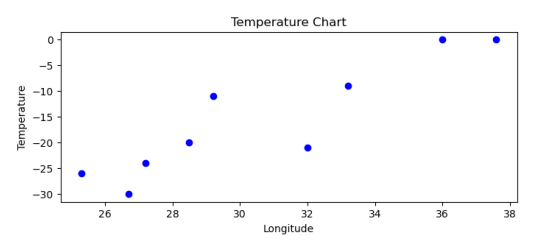

In [7]:
# Create Matplotlib temperature chart
temperatures = data[["lont", "temp", "days", "mon", "day"]].copy()
temperatures = temperatures[temperatures['temp'].notna()]

fig, ax = plt.subplots(figsize=(8, 3))
for i, vals in enumerate(temperatures.iterrows()):
    long = vals[1]['lont']
    temp = vals[1]['temp']
    plt.plot(long, temp, 'bo-', label=f"Point {i + 1}")

ax.set_xlabel('Longitude')
ax.set_ylabel('Temperature')
ax.set_title("Temperature Chart")

# Save the Matplotlib chart as an image
temperature_chart_filename = 'temperature_chart.png'
plt.savefig(temperature_chart_filename, bbox_inches='tight')
plt.close()

# Create FloatImage for the temperature chart
temperature_chart = FloatImage(temperature_chart_filename, bottom=5, left=40)

# Display the temperature chart with Matplotlib
plt.figure(figsize=(8, 3))
plt.imshow(plt.imread(temperature_chart_filename))
plt.axis('off')
plt.show()
